In [1]:
import pandas as pd
import numpy as np
import os 
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Set the colour palette to colour-blind friendly
sns.reset_orig()
my_palette = sns.color_palette("colorblind") # variations of default palette: deep, muted, pastel, bright, dark, colorblind. 
plt.style.use('seaborn-colorblind')
# plt.style.available

In [3]:
# Get the current working directory
print(os.getcwd())

C:\Users\geral\Repository\Coursework


In [4]:
# Change the current working directory
os.chdir(r'C:\Users\geral\Repository\Coursework\Dataset')

print(os.getcwd())

C:\Users\geral\Repository\Coursework\Dataset


## Connecting to database

In [5]:
conn = sqlite3.connect('pydatabase.db')

In [6]:
c = conn.cursor()

Overview of the data

In [7]:
df = pd.read_sql_query('''SELECT Year, 
                COUNT(FlightNum) AS flights,
                AVG(ArrDelay) AS avg_arr_delay,
                MAX(ArrDelay) AS max_arr_delay,
                MIN(ArrDelay) AS min_arr_delay
                FROM 'Y05_06'
                WHERE Cancelled = 0 AND Diverted = 0 AND ArrTime <= 2359 AND DepTime <=2359 
                GROUP BY Year''',conn)
df

,Year,flights,avg_arr_delay,max_arr_delay,min_arr_delay
0,2005,6982428,7.104144,1925.0,-939.0
1,2006,6997085,8.625507,1779.0,-592.0


# Best Time of the Day

For best time of the day, we will be creating a barplot. We separate the day into 24 segments, each segment is 1 hour. 

In [8]:
test = pd.read_sql_query('''SELECT ArrTime, ArrDelay
                            FROM 'Y05_06'
                            WHERE Cancelled = 0 AND Diverted = 0 AND ArrTime <= 2359 AND DepTime <= 2359
''', conn)

test

,ArrTime,ArrDelay
0,1741.0,-18.0
1,1736.0,-23.0
2,1741.0,-24.0
3,1726.0,-33.0
4,2235.0,3.0
...,...,...
13979508,1452.0,-7.0
13979509,2033.0,62.0
13979510,2254.0,13.0
13979511,2209.0,-14.0


In [9]:
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13979513 entries, 0 to 13979512
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ArrTime   float64
 1   ArrDelay  float64
dtypes: float64(2)
memory usage: 320.0 MB


Total Number of observations : 13,979,513

Creating a function to categorise the arrival time into timebins

In [10]:
def recode_timebin(ArrTime):
    '''
    This function serves to sort the arrival time into timebins. 
    
    timebins: in a day, 24 hours is broken down into 24 periods. 
    '''
    if (ArrTime < 100) & (ArrTime >= 0):
        return '0000-0100'
    elif (ArrTime < 200) & (ArrTime >= 100):
        return '0100-0200'
    elif (ArrTime < 300) & (ArrTime >= 200):
        return '0200-0300'
    elif (ArrTime < 400) & (ArrTime >= 300):
        return '0300-0400'
    elif (ArrTime < 500) & (ArrTime >= 400):
        return '0400-0500'
    elif (ArrTime < 600) & (ArrTime >= 500):
        return '0500-0600'
    elif (ArrTime < 700) & (ArrTime >= 600):
        return '0600-0700'
    elif (ArrTime < 800) & (ArrTime >= 700):
        return '0700-0800'
    elif (ArrTime < 900) & (ArrTime >= 800):
        return '0800-0900'
    elif (ArrTime < 1000) & (ArrTime >= 900):
        return '0900-1000'
    elif (ArrTime < 1100) & (ArrTime >= 1000):
        return '1000-1100'
    elif (ArrTime < 1200) & (ArrTime >= 1100):
        return '1100-1200'
    elif (ArrTime < 1300) & (ArrTime >= 1200):
        return '1200-1300'
    elif (ArrTime < 1400) & (ArrTime >= 1300):
        return '1300-1400'
    elif (ArrTime < 1500) & (ArrTime >= 1400):
        return '1400-1500'
    elif (ArrTime < 1600) & (ArrTime >= 1500):
        return '1500-1600'
    elif (ArrTime < 1700) & (ArrTime >= 1600):
        return '1600-1700'
    elif (ArrTime < 1800) & (ArrTime >= 1700):
        return '1700-1800'
    elif (ArrTime < 1900) & (ArrTime >= 1800):
        return '1800-1900'
    elif (ArrTime < 2000) & (ArrTime >= 1900):
        return '1900-2000'
    elif (ArrTime < 2100) & (ArrTime >= 2000):
        return '2000-2100'
    elif (ArrTime < 2200) & (ArrTime >= 2100):
        return '2100-2200'
    elif (ArrTime < 2300) & (ArrTime >= 2200):
        return '2200-2300'
    elif (ArrTime < 2400) & (ArrTime >= 2300):
        return '2300-2359'
    else: 
        return 'NA'

In [11]:
test['Timebin'] = test['ArrTime'].apply(recode_timebin)
test

,ArrTime,ArrDelay,Timebin
0,1741.0,-18.0,1700-1800
1,1736.0,-23.0,1700-1800
2,1741.0,-24.0,1700-1800
3,1726.0,-33.0,1700-1800
4,2235.0,3.0,2200-2300
...,...,...,...
13979508,1452.0,-7.0,1400-1500
13979509,2033.0,62.0,2000-2100
13979510,2254.0,13.0,2200-2300
13979511,2209.0,-14.0,2200-2300


In [12]:
test_2 = test.copy()
test_2 = test_2[['Timebin','ArrTime','ArrDelay']]
test_2

,Timebin,ArrTime,ArrDelay
0,1700-1800,1741.0,-18.0
1,1700-1800,1736.0,-23.0
2,1700-1800,1741.0,-24.0
3,1700-1800,1726.0,-33.0
4,2200-2300,2235.0,3.0
...,...,...,...
13979508,1400-1500,1452.0,-7.0
13979509,2000-2100,2033.0,62.0
13979510,2200-2300,2254.0,13.0
13979511,2200-2300,2209.0,-14.0


In [13]:
check = test_2.groupby('Timebin')
df_btotd = (check.agg({'ArrDelay': 'mean',
                     'Timebin': 'count'})).rename(
    columns={'ArrDelay':'average_arrival_delay',
                                'Timebin':'flights'})

df_btotd

,average_arrival_delay,flights
Timebin,,
0000-0100,51.280666,163504
0100-0200,90.197655,54661
0200-0300,131.861222,17301
0300-0400,126.617625,6797
0400-0500,8.727802,16668
0500-0600,-4.232658,74371
0600-0700,-2.983734,154188
0700-0800,-4.108808,461290
0800-0900,-2.029410,669782


Saving to csv

In [14]:
# df_btotd.to_csv('pydf_btotd.csv', index = True)

Double checking the counts

In [15]:
test['Timebin'].value_counts()

1600-1700    940982
1000-1100    900897
1900-2000    894075
1700-1800    889739
1800-1900    885950
1200-1300    871414
1400-1500    865611
2000-2100    862162
1100-1200    851274
1300-1400    840575
1500-1600    829053
0900-1000    805849
2100-2200    798330
2200-2300    686235
0800-0900    669782
0700-0800    461290
2300-2359    438805
0000-0100    163504
0600-0700    154188
0500-0600     74371
0100-0200     54661
0200-0300     17301
0400-0500     16668
0300-0400      6797
Name: Timebin, dtype: int64

In [16]:
test.Timebin.count()

13979513

## The Plot

Creating a plot which shows the average arrival time in ascending order

In [17]:
test2 = test.copy()

list(test_2)

['Timebin', 'ArrTime', 'ArrDelay']

In [18]:
test_2_sorted = test_2.sort_values(by = 'Timebin', ascending = True)

In [19]:
test_2_sorted

,Timebin,ArrTime,ArrDelay
13916660,0000-0100,17.0,-22.0
9797665,0000-0100,57.0,28.0
2190680,0000-0100,9.0,153.0
8775895,0000-0100,9.0,-6.0
5385976,0000-0100,15.0,0.0
...,...,...,...
12089506,2300-2359,2349.0,-10.0
10473571,2300-2359,2306.0,56.0
12089505,2300-2359,2353.0,-6.0
12089511,2300-2359,2347.0,-12.0


The plot is arranged according to the timebin

[Text(0, 0, '0000-0100'),
 Text(1, 0, '0100-0200'),
 Text(2, 0, '0200-0300'),
 Text(3, 0, '0300-0400'),
 Text(4, 0, '0400-0500'),
 Text(5, 0, '0500-0600'),
 Text(6, 0, '0600-0700'),
 Text(7, 0, '0700-0800'),
 Text(8, 0, '0800-0900'),
 Text(9, 0, '0900-1000'),
 Text(10, 0, '1000-1100'),
 Text(11, 0, '1100-1200'),
 Text(12, 0, '1200-1300'),
 Text(13, 0, '1300-1400'),
 Text(14, 0, '1400-1500'),
 Text(15, 0, '1500-1600'),
 Text(16, 0, '1600-1700'),
 Text(17, 0, '1700-1800'),
 Text(18, 0, '1800-1900'),
 Text(19, 0, '1900-2000'),
 Text(20, 0, '2000-2100'),
 Text(21, 0, '2100-2200'),
 Text(22, 0, '2200-2300'),
 Text(23, 0, '2300-2359')]

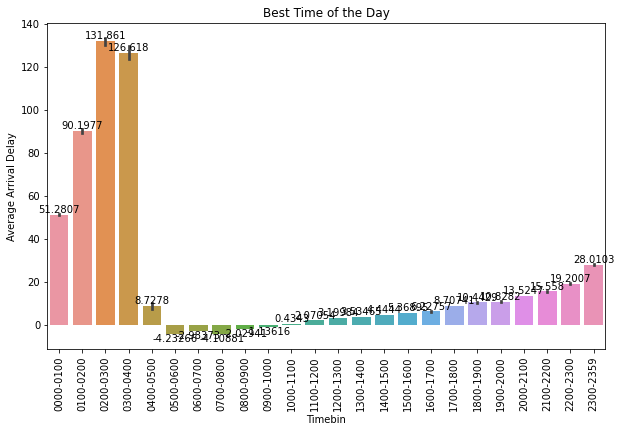

In [20]:
# plotting as a bar plot
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(data = test_2_sorted, x = 'Timebin', y = 'ArrDelay')

ax.title.set_text('Best Time of the Day')
ax.set_xlabel('Timebin')
ax.set_ylabel('Average Arrival Delay')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# Best Day of the Week

In [21]:
BDoWeek = pd.read_sql_query('''
                SELECT Dayofweek,
                COUNT(FlightNum) AS flights,
                AVG(ArrDelay) AS average_arrival_delay 
                FROM 'Y05_06'
                WHERE Cancelled = 0 AND Diverted = 0 AND ArrTime <=2359 AND DepTime <= 2359
                GROUP BY Dayofweek''', conn)
BDoWeek

,DayOfWeek,flights,average_arrival_delay
0,1,2051847,8.275677
1,2,2025076,5.725019
2,3,2039089,7.697851
3,4,2051644,10.545961
4,5,2061542,10.846870
5,6,1785588,4.197585
6,7,1964727,7.224390


Saving the data to csv format

In [22]:
# BDoWeek.to_csv('pyBDOW.csv')

### Creating the plot

In [23]:
BDoWeek = BDoWeek.assign(Dayofweek2 = BDoWeek.DayOfWeek)
BDoWeek

,DayOfWeek,flights,average_arrival_delay,Dayofweek2
0,1,2051847,8.275677,1
1,2,2025076,5.725019,2
2,3,2039089,7.697851,3
3,4,2051644,10.545961,4
4,5,2061542,10.846870,5
5,6,1785588,4.197585,6
6,7,1964727,7.224390,7


Creating a function to recode the day of the week 

In [24]:
def recode_day(DayOfWeek):
    '''
    A function to rename the days from 1: Mon, 2: Tue so on and so forth
    '''
    if DayOfWeek == 1:
        return 'Mon'
    elif DayOfWeek == 2:
        return 'Tue'
    elif DayOfWeek == 3:
        return 'Wed'
    elif DayOfWeek == 4:
        return 'Thu'
    elif DayOfWeek == 5:
        return 'Fri'
    elif DayOfWeek == 6:
        return 'Sat'
    else: 
        return 'Sun'

In [25]:
BDoWeek['Dayofweek2'] = BDoWeek['DayOfWeek'].apply(recode_day)
BDoWeek

,DayOfWeek,flights,average_arrival_delay,Dayofweek2
0,1,2051847,8.275677,Mon
1,2,2025076,5.725019,Tue
2,3,2039089,7.697851,Wed
3,4,2051644,10.545961,Thu
4,5,2061542,10.846870,Fri
5,6,1785588,4.197585,Sat
6,7,1964727,7.224390,Sun


Checking the columns

In [26]:
BDoWeek = BDoWeek[['Dayofweek2','DayOfWeek','flights','average_arrival_delay']]
BDoWeek

,Dayofweek2,DayOfWeek,flights,average_arrival_delay
0,Mon,1,2051847,8.275677
1,Tue,2,2025076,5.725019
2,Wed,3,2039089,7.697851
3,Thu,4,2051644,10.545961
4,Fri,5,2061542,10.846870
5,Sat,6,1785588,4.197585
6,Sun,7,1964727,7.224390


Sorted according to average arrival delay in ascending order

In [27]:
df_bdoweek = BDoWeek.copy()
df_bdoweek_sorted = df_bdoweek.sort_values(by = 'average_arrival_delay', 
                                           ascending = True)
df_bdoweek_sorted

,Dayofweek2,DayOfWeek,flights,average_arrival_delay
5,Sat,6,1785588,4.197585
1,Tue,2,2025076,5.725019
6,Sun,7,1964727,7.224390
2,Wed,3,2039089,7.697851
0,Mon,1,2051847,8.275677
3,Thu,4,2051644,10.545961
4,Fri,5,2061542,10.846870


In [28]:
df_bdoweek_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 5 to 4
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dayofweek2             7 non-null      object 
 1   DayOfWeek              7 non-null      int64  
 2   flights                7 non-null      int64  
 3   average_arrival_delay  7 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 280.0+ bytes


### The Plot

C:\Users\geral\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


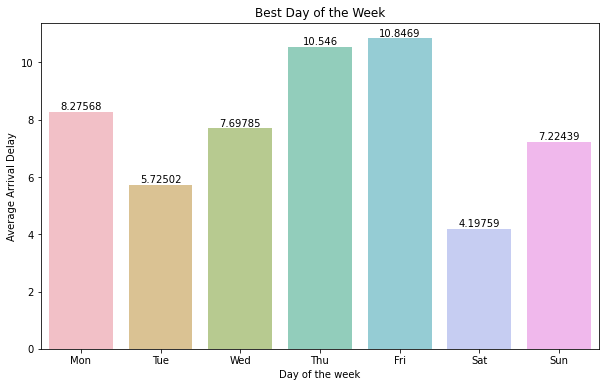

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(BDoWeek['Dayofweek2'], 
       BDoWeek['average_arrival_delay'], 
       alpha = 0.6)
ax.title.set_text('Best Day of the Week')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Average Arrival Delay')
ax.bar_label(ax.containers[0])
plt.show()

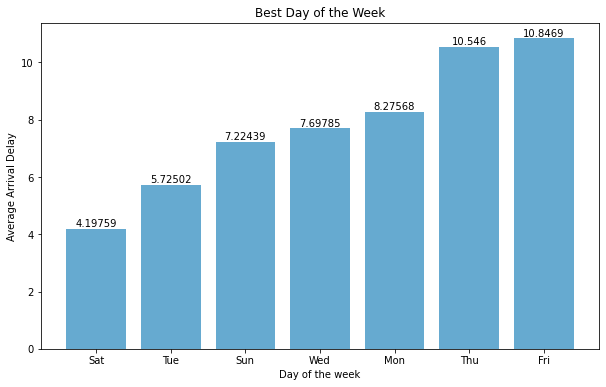

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(df_bdoweek_sorted['Dayofweek2'], 
       df_bdoweek_sorted['average_arrival_delay'], 
       alpha = 0.6)
ax.title.set_text('Best Day of the Week')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Average Arrival Delay')
ax.bar_label(ax.containers[0])
plt.show()

# Best Time of the Year

Solving the last part of the question: "Best time of the year to travel" 
The following codes gives us the average arrival delays. Currently Months 4,5,9 have the lowest departure delay. i.e Apr, May, Sep

In [31]:
btoy = pd.read_sql_query('''SELECT Month,
                COUNT(FlightNum) AS flights,
                AVG(ArrDelay) AS average_arrival_delay 
                FROM 'Y05_06'
                WHERE Cancelled = 0 AND Diverted = 0 AND ArrTime <= 2359 AND DepTime <= 2359
                GROUP BY Month''', conn)
btoy

,Month,flights,average_arrival_delay
0,1,1136706,7.781971
1,2,1052193,6.702786
2,3,1201414,7.716104
3,4,1162500,4.442250
4,5,1201410,4.900478
5,6,1182382,10.824192
6,7,1218516,12.460591
7,8,1230862,8.708984
8,9,1134742,5.491875
9,10,1179656,7.632951


Function to recode month

In [32]:
def recode_month(Month):
    '''
    This function is to rename the numeric months into the calendar months.
    e.g 1: Jan, 2: Feb so on and so forth 
    '''
    if Month == 1:
        return 'Jan'
    elif Month == 2:
        return 'Feb'
    elif Month == 3:
        return 'Mar'
    elif Month == 4:
        return 'Apr'
    elif Month == 5:
        return 'May'
    elif Month == 6:
        return 'Jun'
    elif Month == 7:
        return 'Jul'
    elif Month == 8:
        return 'Aug'
    elif Month == 9:
        return 'Sep'
    elif Month == 10:
        return 'Oct'
    elif Month == 11:
        return 'Nov'
    else: 
        return 'Dec'

In [33]:
btoy['Month2'] = btoy['Month'].apply(recode_month)
btoy

,Month,flights,average_arrival_delay,Month2
0,1,1136706,7.781971,Jan
1,2,1052193,6.702786,Feb
2,3,1201414,7.716104,Mar
3,4,1162500,4.442250,Apr
4,5,1201410,4.900478,May
5,6,1182382,10.824192,Jun
6,7,1218516,12.460591,Jul
7,8,1230862,8.708984,Aug
8,9,1134742,5.491875,Sep
9,10,1179656,7.632951,Oct


In [34]:
btoy = btoy[['Month2', 'Month', 'flights', 'average_arrival_delay']]
btoy

,Month2,Month,flights,average_arrival_delay
0,Jan,1,1136706,7.781971
1,Feb,2,1052193,6.702786
2,Mar,3,1201414,7.716104
3,Apr,4,1162500,4.442250
4,May,5,1201410,4.900478
5,Jun,6,1182382,10.824192
6,Jul,7,1218516,12.460591
7,Aug,8,1230862,8.708984
8,Sep,9,1134742,5.491875
9,Oct,10,1179656,7.632951


A dataframe of the btoy sorted according to average arrival delay in ascending order.

In [35]:
btoy = btoy.copy()

df_btoy_sorted = btoy.sort_values(by = 'average_arrival_delay',
                                     ascending = True)
df_btoy_sorted

,Month2,Month,flights,average_arrival_delay
3,Apr,4,1162500,4.442250
4,May,5,1201410,4.900478
8,Sep,9,1134742,5.491875
10,Nov,11,1134330,6.199588
1,Feb,2,1052193,6.702786
9,Oct,10,1179656,7.632951
2,Mar,3,1201414,7.716104
0,Jan,1,1136706,7.781971
7,Aug,8,1230862,8.708984
5,Jun,6,1182382,10.824192


Creating a csv

In [36]:
# df_btoy_sorted.to_csv('pydf_btoy.csv', index = False)

## The Plot

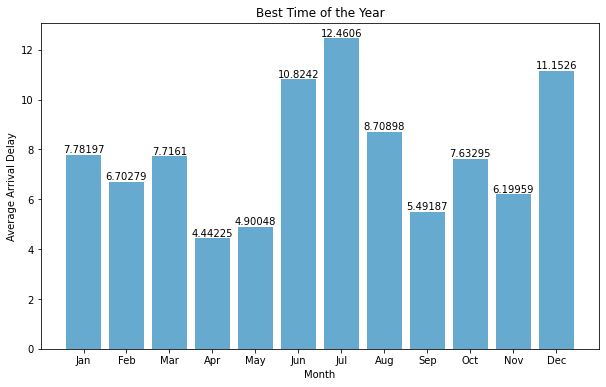

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(btoy['Month2'], 
       btoy['average_arrival_delay'], 
       alpha = 0.6)
ax.title.set_text('Best Time of the Year')
ax.set_xlabel('Month')
ax.set_ylabel('Average Arrival Delay')
ax.bar_label(ax.containers[0])
plt.show()

Plot for sorted 

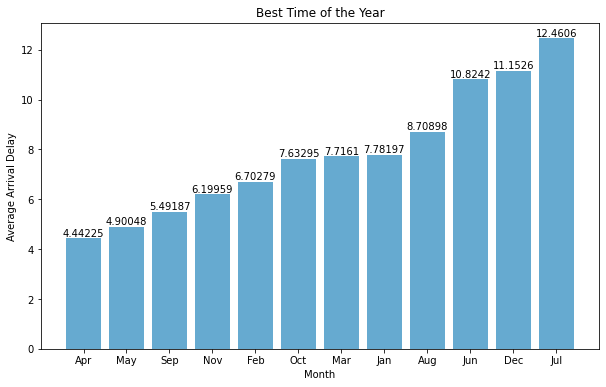

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(df_btoy_sorted['Month2'], 
       df_btoy_sorted['average_arrival_delay'], 
       alpha = 0.6)
ax.title.set_text('Best Time of the Year')
ax.set_xlabel('Month')
ax.set_ylabel('Average Arrival Delay')
ax.bar_label(ax.containers[0])
plt.show()

### Disconnecting from db

In [39]:
conn.close()